In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import seaborn as sns
import os, sys
import ruamel.yaml as yaml
import itertools
from scipy.stats import mannwhitneyu,ks_2samp

plot_dir = "/Users/eric/repos/gohr/misc/ml_plots/bandit/"

if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

In [91]:
class SafeLoaderIgnoreUnknown(yaml.SafeLoader):
    def ignore_unknown(self, node):
        return None 

SafeLoaderIgnoreUnknown.add_constructor(None, SafeLoaderIgnoreUnknown.ignore_unknown)

# Location of rule runs
rule_runs_path = "/Users/eric/repos/gohr/bandit/outputs/meta_bandit1"
rule_dirs = [name for name in os.listdir(rule_runs_path) if name!=".DS_Store"]
move_df_list=[]
for rule_dir in rule_dirs:
    rule_dir_path = os.path.join(rule_runs_path,rule_dir)
    runs = [name for name in os.listdir(rule_dir_path) if name!=".DS_Store"]
    
    for run in runs:
        run_path=os.path.join(rule_dir_path,run)
        yaml_path = os.path.join(run_path,"data.yaml")
        with open(yaml_path, 'r') as param_file:
            args = yaml.load(param_file, Loader=SafeLoaderIgnoreUnknown)
            featurization =args["FEATURIZATION"]
            learner = args["LEARNER"]
        move_results = pd.read_csv(os.path.join(run_path,'move_data.csv'))
        move_results['move']=move_results.index+1
        rule_name = args['RULE_NAME'].split('.')[0]
        move_results['rule']=rule_name
        move_results['id']=rule_name+str(run)
        move_results['run']=str(run)
        move_results['error']= move_results['reward']*-1
        move_results['cumulative_error']=move_results.error.cumsum()
        move_results['end']=0
        move_results.at[move_results.index[-1],"end"]=1
        move_df_list.append(move_results)

move_df = pd.concat(move_df_list,ignore_index=True)

In [77]:
display(move_df.iloc[0:230])

,episode,time,action_type,action,move_row,move_col,acting_cred,reward,done,board,cred,move,rule,id,run,error,cumulative_error,end
0,0,0,"('shape',)",1,2,1,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'TRIANGLE...","[(('shape',), -1), (('color',), -1), (('row',)...",1,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,0,0
1,0,1,"('shape',)",2,5,6,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,-1,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'TRIANGLE...","[(('shape',), -1), (('color',), -1), (('row',)...",2,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,1,1,0
2,0,2,"('shape',)",0,1,3,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'TRIANGLE...","[(('shape',), -1), (('color',), -1), (('row',)...",3,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,1,0
3,0,3,"('shape',)",0,2,2,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'TRIANGLE...","[(('shape',), -1), (('color',), -1), (('row',)...",4,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,1,0
4,0,4,"('shape',)",0,3,4,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'TRIANGLE...","[(('shape',), 0), (('color',), -1), (('row',),...",5,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,24,6,"('shape',)",1,1,4,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,0,"[{'id': 3, 'color': 'BLACK', 'shape': 'TRIANGL...","[(('shape',), 217), (('color',), 202), (('row'...",226,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,3,0
226,24,7,"('shape',)",3,1,6,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,0,"[{'id': 7, 'color': 'BLACK', 'shape': 'SQUARE'...","[(('shape',), 218), (('color',), 203), (('row'...",227,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,3,0
227,24,8,"('shape',)",0,6,4,[[ 0 1 0 0]\n [ 1 0 0 0]\n [ 0 -1 -1 1]...,0,1,[],"[(('shape',), 219), (('color',), 204), (('row'...",228,1_1_shape_3m_cua,1_1_shape_3m_cua61,61,0,3,1
228,0,0,"('shape',)",2,1,4,[[ 0 0 0 1]\n [ 1 0 -1 -1]\n [-1 -1 -1 1]...,-1,0,"[{'id': 0, 'color': 'RED', 'shape': 'TRIANGLE'...","[(('shape',), -1), (('color',), -1), (('row',)...",1,1_1_shape_3m_cua,1_1_shape_3m_cua95,95,1,1,0


In [92]:
# Rule name replacement
move_df.replace(to_replace={ '1_1_shape_4m':'SM','1_2_shape_4m':'SM2O','1_1_shape_3m_cua':'SM1F',
                                '1_1_color_4m':'CM','1_2_color_4m':'CM2O','1_1_color_3m_cua':'CM1F',
                                'clockwiseZeroStart':'CW','clockwiseTwoFreeAlt':'CWAF','clockwiseTwoFree':'CW2F',
                                'quadrantNearby':'QN','quadrantNearbyTwoFree':'QN2F',
                                 'bottomLeft_then_topRight':'BLTR','bottom_then_top':'BT'},inplace=True)
# terminal_results_df.replace(to_replace={ '1_1_shape_4m':'SM','1_2_shape_4m':'SM2O','1_1_shape_3m_cua':'SM1F',
#                                 '1_1_color_4m':'CM','1_2_color_4m':'CM2O','1_1_color_3m_cua':'CM1F',
#                                 'clockwiseZeroStart':'CW','clockwiseTwoFreeAlt':'CWAF','clockwiseTwoFree':'CW2F',
#                                 'quadrantNearby':'QN','quadrantNearbyTwoFree':'QN2F',
#                                 'bottomLeft_then_topRight':'BLTR','bottom_then_top':'BT'},inplace=True)

In [89]:
rules_list = [  {"name":"shape_rules","tname":"Shape rules","rules":["SM","SM1F","SM2O"],"y":[0,25],"tick_step":500},
                {"name":"color_rules","tname":"Color rules","rules":["CM","CM1F","CM2O"],"y":[0,3000],"tick_step":500}, 
                {"name":"clockwise_rules","tname":"Clockwise rules","rules":["CW","CWAF","CW2F"],"y":[0,3000],"tick_step":500},
                {"name":"quadrant_rules","tname":"Quadrant rules","rules":["QN","QN2F"],"y":[0,400],"tick_step":100},
                {"name":"bottom_top_rules","tname":"Alternating rules","rules":["BLTR","BT"],"y":[0,800],"tick_step":200}
                ]
gs = GridSpec(nrows = len(rules_list),ncols=3,hspace=.3)


In [48]:
move_df.head()

,episode,time,action_type,action,reward,done,board,move,rule,id,error,cumulative_error,end
0,0,0,"('shape',)",0,0,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'STAR', '...",1,1_1_color_3m_cua,1_1_color_3m_cua32,0,0,0
1,0,1,"('shape',)",0,-1,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'STAR', '...",2,1_1_color_3m_cua,1_1_color_3m_cua32,1,1,0
2,0,2,"('color',)",0,-1,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'STAR', '...",3,1_1_color_3m_cua,1_1_color_3m_cua32,1,2,0
3,0,3,"('bucket1',)",3,0,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'STAR', '...",4,1_1_color_3m_cua,1_1_color_3m_cua32,0,2,0
4,0,4,"('bucket1',)",2,-1,0,"[{'id': 0, 'color': 'BLUE', 'shape': 'STAR', '...",5,1_1_color_3m_cua,1_1_color_3m_cua32,1,3,0


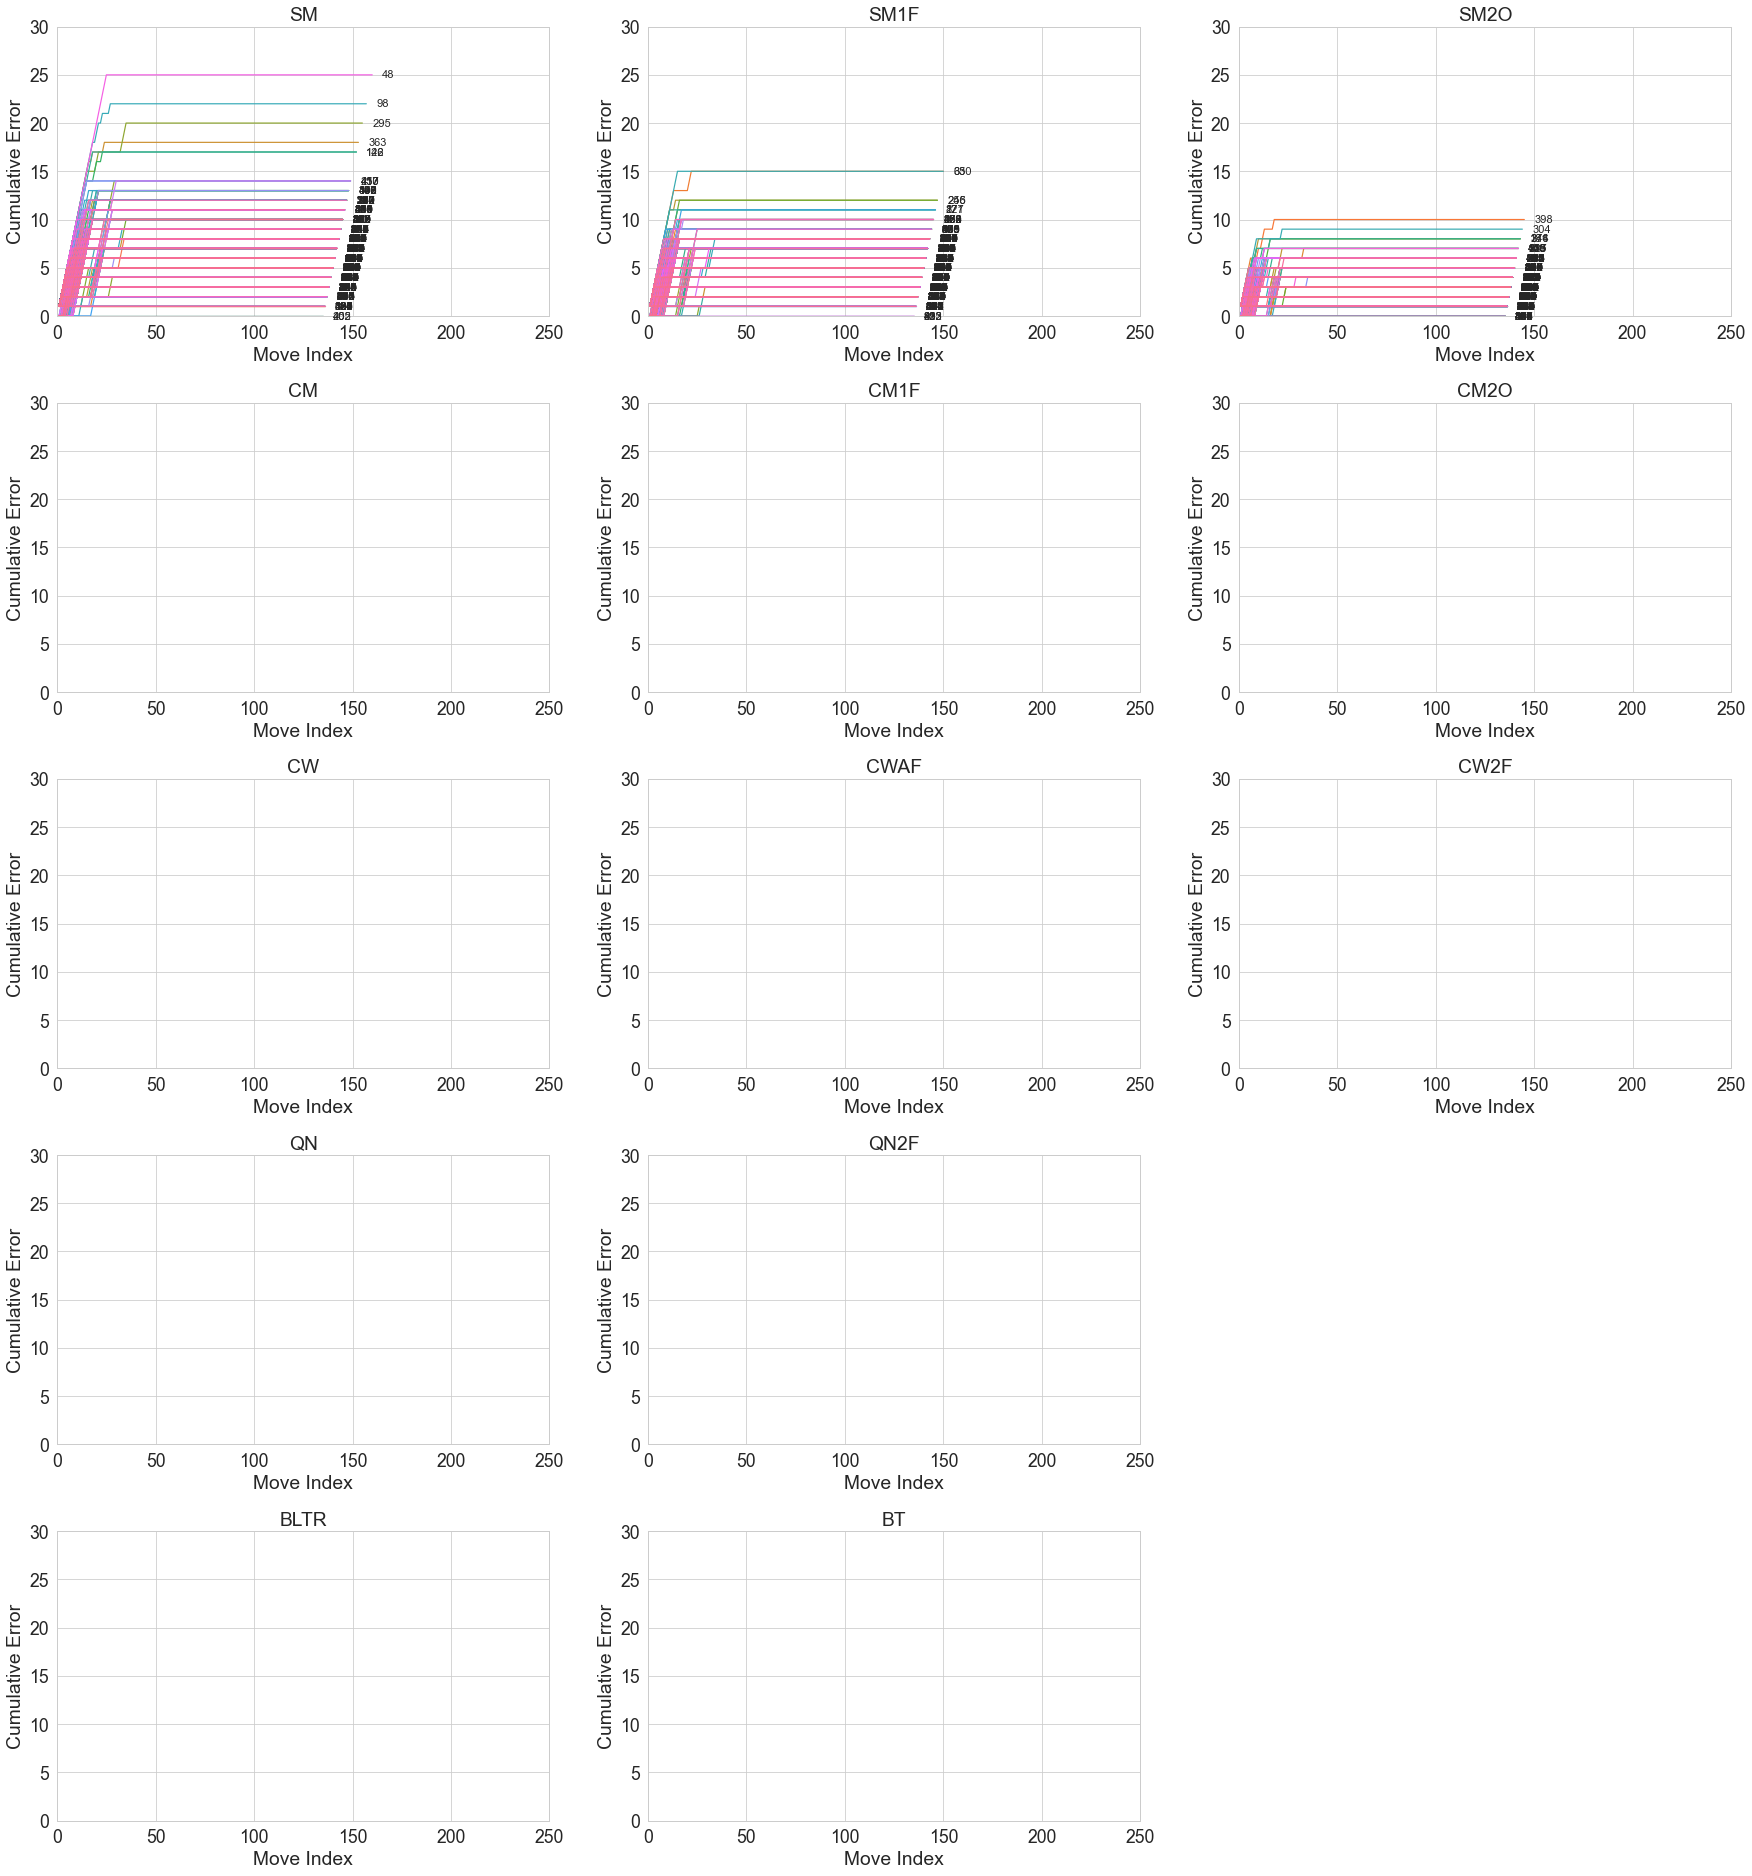

In [93]:
# Create a figure grid for all results
label = True
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
fig = plt.figure(figsize=(30,33))
for i,rule_set in enumerate(rules_list):
    sub_dict = rules_list[i]
    sub_list = sub_dict["rules"]
    name = sub_dict["name"]
    tname = sub_dict["tname"]
    for j,rule in enumerate(sub_list):
        ax = fig.add_subplot(gs[i,j])
        df = move_df.query("rule==@rule").copy()
        sns.lineplot(ax=ax,data=df,y="cumulative_error",x="move",hue='id',estimator=None,legend=False)
        ax.set_title(rule)
        ax.set_ylim([0,30])
        ax.set_xlim([0,250])
        ax.set_ylabel("Cumulative Error")
        ax.set_xlabel("Move Index")
        if label:
            label_df = df.query("end==1").copy()[["run","cumulative_error","move"]]
            
            for r,ce,m in label_df.itertuples(index=False):
                ax.text(x=int(m)+5,y=ce,s=str(r),va="center",size='xx-small')
#plt.savefig(plot_dir+'med_learning_feats_'+learner+'.pdf',bbox_inches='tight',facecolor='w')

In [ ]:
# REINFORCE array plotting
complete_list = episode_results_df.rule.unique()
rules_list = [#{"name":"all_rules","rules":complete_list,"y":[0,4000]},
                #{"name":"quick_test","rules":["1_1_shape_4m","1_2_shape_4m"],"y":[0,2500]}
                #{"name":"base_rules","rules":["1_1_shape_4m","clockwiseZeroStart","quadrantNearby","bottomLeft_then_topRight"],"y":[0,4000]},
                {"name":"shape_rules","tname":"Shape rules","rules":["SM","SM1F","SM2O"],"y":[0,25000], "tick_step":5000},
                {"name":"color_rules","tname":"Color rules","rules":["CM","CM1F","CM2O"],"y":[0,25000], "tick_step":5000}, 
                {"name":"clockwise_rules","tname":"Clockwise rules","rules":["CW","CWAF","CW2F"],"y":[0,25000], "tick_step":5000},
                {"name":"quadrant_rules","tname":"Quadrant rules","rules":["QN","QN2F"],"y":[0,400], "tick_step":100},
                {"name":"bottom_top_rules","tname":"Alternating rules","rules":["BLTR","BT"],"y":[0,8000], "tick_step":2000}
                ]

steps = [2,4,6,8]
print(steps)
gs = GridSpec(nrows = len(rules_list),ncols=len(steps),hspace=0.25)
#feats = ["NAIVE_N_BD_AD","NAIVE_N_BS_AD","NAIVE_N_BD_AS","NAIVE_N_BDa_AS","NAIVE_N_BS_AS", "NAIVE_N_BSD_ASD"]
feats = ["BD_AD","BS_AD","BD_AS","BS_AS", "BSD_ASD"]

In [ ]:
learners = ["DQN","REINFORCE"]
for learner in learners:
    #print(learner)
    for idx,step in enumerate(steps):
        #print(step)
        for i in range(len(rules_list)):
            sub_dict = rules_list[i]
            sub_list = sub_dict["rules"]
            name = sub_dict["name"]
            tname = sub_dict["tname"]
            for feat in feats:
                for rule in sub_list:
                    results_df = terminal_results_df.query("learner==@learner & memory==@step & featurization==@feat & rule==@rule")
                    count = results_df.cumulative_error.count()
                    if count!=20:
                        print(learner,step,feat,rule,count)

In [ ]:

reduced_results.head()

In [ ]:
learner='DQN'
# Array plotting
reduced_results = episode_results_df.query("episode%2==0 & learner==@learner").copy()
reduced_results["Rule"] = reduced_results.rule
reduced_results["Featurization"]=reduced_results.featurization
# Create a figure grid for all results
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
fig = plt.figure(figsize=(30,33))
for idx,step in enumerate(steps):
    #results_df = episode_results_df[episode_results_df.memory==step]
    results_df = reduced_results[reduced_results.memory==step]
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        tname = sub_dict["tname"]
        ax = fig.add_subplot(gs[i,idx])
        df = results_df.query("rule in @sub_list").copy()
        if not(step==8):
            ax=sns.lineplot(data=df,y="cumulative_error",x="episode",errorbar=("ci",95),n_boot=500, estimator=np.median,hue="Rule",hue_order=sub_list,style="Featurization",style_order=feats,legend=False)
        else:
            ax=sns.lineplot(data=df,y="cumulative_error",x="episode",errorbar=("ci",95),n_boot=500, estimator=np.median,hue="Rule",hue_order=sub_list,style="Featurization",style_order=feats)
            #errorbar=("ci",95),n_boot=1
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_title(tname+" with {} steps of memory".format(str(step)))
        ax.set_ylim(np.array(sub_dict["y"]))
        if step==2:
            ax.set_ylabel("Cumulative Error")
        else:
            ax.set_ylabel("")
        ax.set_xlabel("Episode")
#plt.savefig(plot_dir+'dqn_500_500_ml_6_ways.pdf',bbox_inches='tight',facecolor='w')
plt.savefig(plot_dir+'med_learning_feats_'+learner+'.pdf',bbox_inches='tight',facecolor='w')

In [ ]:
steps=[2,4,6,8]

In [ ]:
terminal_results_df.head()

In [ ]:
display(terminal_results_df.query("learner=='DQN'  & featurization=='BD_AD' & memory==6"))

In [ ]:
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
#fig,axs = plt.subplots(constrained_layout=True,figsize=(30,33))
#subfigs=fig.subfigures(len(rules_list),1,hspace=0.5)
#fig, axs = plt.subplots(len(rules_list), 1, layout='constrained', figsize=(30, 33))
#gridspec = axs[0, 0].get_subplotspec().get_gridspec()
results_df = terminal_results_df.query("learner=='DQN'").copy()

for i in range(len(rules_list)):

    sub_dict = rules_list[i]
    sub_list = sub_dict["rules"]
    name = sub_dict["name"]
    tname = sub_dict["tname"]
    step = 500
    tick_max= int((np.ceil(results_df.query("rule in @sub_list").adj_cumulative_error.max()/step)+2)*step)
    ticks = [*range(0,tick_max,step)]
    str_ticks = [str(i) for i in ticks]
    str_ticks[-1]='C.N.M.'
    g=sns.catplot(data=results_df.query("rule in @sub_list").fillna(ticks[-1]), x='rule',y='adj_cumulative_error',col='memory',hue='featurization',dodge=True,kind='strip')
    g.set_axis_labels("","TCE")
    #g.set_yticks(ticks)
    #g.set_yticklabels(str_ticks)
    lax = g.axes.flat[0]
    lax.set_yticks(ticks)
    lax.set_yticklabels(str_ticks)


In [ ]:
# Create a figure grid for all results
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
fig = plt.figure(figsize=(30,33),constrained_layout=True)

learner = 'REINFORCE'
for idx,step in enumerate(steps):
    #results_df = episode_results_df[episode_results_df.memory==step]
    results_df = terminal_results_df.query("memory==@step & learner==@learner").copy()
    for i in range(len(rules_list)):
        sub_dict = rules_list[i]
        sub_list = sub_dict["rules"]
        name = sub_dict["name"]
        tname = sub_dict["tname"]
        tick_step = sub_dict["tick_step"]
        tick_max= int((np.ceil(terminal_results_df.query("rule in @sub_list & learner==@learner").adj_cumulative_error.max()/tick_step)+2)*tick_step)
        ticks = [*range(0,tick_max,tick_step)]
        str_ticks = [str(i) for i in ticks]
        str_ticks[-1]='C.N.M.'
        ax = fig.add_subplot(gs[i,idx])
        if not(step==8):
            ax=sns.stripplot(data=results_df.query("rule in @sub_list").fillna(ticks[-1]),x='rule',y="adj_cumulative_error",order = sub_list,hue="featurization",hue_order=feats,dodge=True)
            ax.get_legend().remove()
        else:
            ax=sns.stripplot(data=results_df.query("rule in @sub_list").fillna(ticks[-1]),x='rule',y="adj_cumulative_error",order=sub_list,hue="featurization", hue_order=feats,dodge=True)
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Featurization")
        ax.set_title(tname+" with {} steps of memory".format(str(step)))
        #ax.set_ylim(np.array(sub_dict["y"]))
        ax.set_xlabel("")
        ax.set_yticks(ticks)
        ax.set_yticklabels(str_ticks)
        if step==2:
            ax.set_ylabel("TCE")
        else:
            ax.set_ylabel("")
        #ax.set_xlabel("Episode")
plt.savefig(plot_dir+"terminal_strip_feats_"+learner+".pdf",bbox_inches='tight',facecolor='w')

In [ ]:
display(terminal_results_df.query("memory==6 & featurization=='BD_AD' & rule=='SM'"))

In [ ]:
# Final results plotting
sns.set_style('ticks')
sns.set_context('paper',font_scale=2)
chosen_rules = [rule for rule in base_rules if rule not in ['CM','CM1F','CM2O']]
final_df = terminal_results_df.copy()
max_val_reinforce = final_df.query("learner=='REINFORCE'").adj_cumulative_error.max()
max_val_dqn = final_df.query("learner=='DQN'").adj_cumulative_error.max()

#fig, (ax1,ax2) = plt.subplots(figsize=(4,7),nrows=2,sharex=True, gridspec_kw={'height_ratios':[1,5]})

step = 500
tick_max_dqn= int((np.ceil(max_val_dqn/step)+2)*step)
ticks_dqn = [*range(0,tick_max_dqn,step)]
str_ticks_dqn = [str(i) for i in ticks_dqn]
str_ticks_dqn[-1]='C.N.M.'
colors = ['b','g','r','c']

fig = plt.figure(layout='constrained',figsize=(5,5))
subfigs = fig.subfigures(1,2,wspace=0.1)
ax1 = subfigs[0].subplots()
sp_rule_list = ['QN','BLTR','CW','SM']
palette = sns.color_palette(None,len(sp_rule_list))
sp_color = {"SM":palette[0],
            "QN":palette[1],
            "BLTR":palette[3],
            "CW":palette[2]}
jitter =0.4
for i,cr in enumerate(sp_rule_list):
    sns.stripplot(ax=ax1,data=final_df.query("learner=='DQN' & rule==@cr").fillna(ticks_dqn[-1]),y='adj_cumulative_error',color=sp_color[cr],jitter=jitter)
#ax1.set_ylim(0,5000)
#for i in range(4):
#    leg.legend_handles[0].setcolor(colors[i])
#ax1.set_yscale('log')
ax1.set_yticks(ticks_dqn)
ax1.set_yticklabels(str_ticks_dqn)
ax1.set_ylabel("TCE")
ax1.set_title("DQN")
ax1.set_xticks([])
ax1.set_ylim(ticks_dqn[0]-0.25*step,ticks_dqn[-1]+0.25*step)

step = 5000
tick_max_rn= int((np.ceil(max_val_reinforce/step)+2)*step)
ticks_rn = [*range(0,tick_max_rn,step)]
str_ticks_rn = [str(i) for i in ticks_rn]
str_ticks_rn[-1]='C.N.M.'
ax2 = subfigs[1].subplots()

for i,cr in enumerate(sp_rule_list):
    sns.stripplot(ax=ax2,data=final_df.query("learner=='REINFORCE' & rule==@cr").fillna(ticks_rn[-1]),y='adj_cumulative_error',color=sp_color[cr],jitter=jitter)

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.set_ylim(ticks_rn[0]-0.25*step,ticks_rn[-1]+0.25*step)
#for i in range(4):
#    leg.legend_handles[0].setcolor(colors[i])
#ax1.set_yscale('log')
ax2.set_yticks(ticks_rn)
ax2.set_yticklabels(str_ticks_rn)
ax2.set_ylabel("")
ax2.set_title("REINFORCE")
ax2.set_xticks([])
#ax1.spines[['right','top']].set_visible(False)
#ax2.spines[['left','top']].set_visible(False)

# fig.legend(labels=['SM','QN','BLTR','CW'],loc='upper center', 
#              bbox_to_anchor=(0.5, -0.2),ncol=4)
handles, labels = ax1.get_legend_handles_labels()
for i,cr in enumerate(sp_rule_list):
    patch = mpatches.Patch(color=sp_color[cr],label=cr)
    handles.append(patch)

plt.legend(handles=handles,ncol=4,loc='upper center',bbox_to_anchor=(-0.05,-0.05))

plt.savefig(plot_dir+"rl_base_rules_sp.pdf",bbox_inches='tight',facecolor='w')

In [ ]:
# Final results plotting
sns.set(font_scale=2)
sns.set_style('ticks')
sns.set_context('paper',font_scale=2)
chosen_rules = complete_rules
final_df = terminal_results_df.copy()
max_val_dqn = final_df.query("learner=='DQN'").adj_cumulative_error.max()

#fig, (ax1,ax2) = plt.subplots(figsize=(4,7),nrows=2,sharex=True, gridspec_kw={'height_ratios':[1,5]})

step = 500
tick_max_dqn= int((np.ceil(max_val_dqn/step)+2)*step)
ticks_dqn = [*range(0,tick_max_dqn,step)]
str_ticks_dqn = [str(i) for i in ticks_dqn]
str_ticks_dqn[-1]='C.N.M.'
#colors = ['b','g','r','c']

fig = plt.figure(layout='constrained',figsize=(15,8))
jitter =0.3
#for i,cr in enumerate(sp_rule_list):
sns.stripplot(data=final_df.query("learner=='DQN'").fillna(ticks_dqn[-1]),x='rule',hue='rule',order=chosen_rules,hue_order=chosen_rules,y='adj_cumulative_error',jitter=jitter,legend=False)
ax1=plt.gca()
ax1.set_yticks(ticks_dqn)
ax1.set_yticklabels(str_ticks_dqn)
ax1.set_ylabel("TCE")
ax1.set_xlabel("Rule")
ax1.set_ylim(ticks_dqn[0]-0.25*step,ticks_dqn[-1]+0.25*step)

plt.savefig(plot_dir+"rl_complete_rules_sp_dqn.pdf",bbox_inches='tight',facecolor='w')

In [ ]:
# Final results plotting
sns.set(font_scale=2)
sns.set_style('ticks')
sns.set_context('paper',font_scale=2)
chosen_rules = complete_rules
final_df = terminal_results_df.copy()
max_val_reinforce = final_df.query("learner=='REINFORCE'").adj_cumulative_error.max()
step = 5000
tick_max_rn= int((np.ceil(max_val_reinforce/step)+2)*step)
ticks_rn = [*range(0,tick_max_rn,step)]
str_ticks_rn = [str(i) for i in ticks_rn]
str_ticks_rn[-1]='C.N.M.'
fig = plt.figure(layout='constrained',figsize=(15,8))
sns.stripplot(data=final_df.query("learner=='REINFORCE'").fillna(ticks_rn[-1]),x='rule',hue='rule',order=chosen_rules,hue_order=chosen_rules,y='adj_cumulative_error',jitter=jitter,legend=False)
#ax1.set_ylim(0,5000)
#for i in range(4):
#    leg.legend_handles[0].setcolor(colors[i])
#ax1.set_yscale('log')
ax1=plt.gca()
ax1.set_yticks(ticks_rn)
ax1.set_yticklabels(str_ticks_rn)
ax1.set_ylabel("TCE")
ax1.set_xlabel("Rule")
#ax1.set_title("DQN")
#ax1.set_xticks([])
ax1.set_ylim(ticks_rn[0]-0.25*step,ticks_rn[-1]+0.25*step)
#plt.legend(title='Rule')
plt.savefig(plot_dir+"rl_complete_rules_sp_rn.pdf",bbox_inches='tight',facecolor='w')

In [ ]:
# Base rules comparison
cur_rules = base_rules

final_nonan = final_df.copy().fillna(50000)

for alg in ['DQN','REINFORCE']:
    print(alg)
    mw_heatmap = np.empty((len(cur_rules),len(cur_rules)))
    mw_heatmap[:]=np.nan
    for idx,i in enumerate(cur_rules):
        for idy,j in enumerate(cur_rules):
            a = final_nonan.query("rule==@i & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            #print(a)
            b = final_nonan.query("rule==@j & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            #print(b)
            if np.isnan(mw_heatmap[idy,idx]):
                #u,p1 = mannwhitneyu(x=a,y=b,alternative="less",method="asymptotic")
                u,p1 = mannwhitneyu(x=a,y=b,method="asymptotic")
                #mw_heatmap[idx,idy]=np.around(p1,decimals=4)
                mw_heatmap[idx,idy]=p1
    print(mw_heatmap)

In [ ]:
# Generality comparisons
gen_comparisons = [['SM','SM1F','SM2O'],
                   ['CM','CM1F','CM2O'],
                   ['QN','QN2F'],
                   ['BLTR','BT'],
                   ['CW','CWAF','CW2F']]
for alg in ['DQN','REINFORCE']:
    print(alg)
    for rule_set in gen_comparisons:
        print(rule_set)
        if len(rule_set)==3:
            a = final_df.query("rule==@rule_set[0] & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            b = final_df.query("rule==@rule_set[1]  & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            c = final_df.query("rule==@rule_set[2]  & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            print(a.size,b.size,c.size)
            print("Comparing {} to {}".format(rule_set[1],rule_set[0]))
            u,p1 = mannwhitneyu(x=b,y=a,alternative="greater",method="asymptotic")
            print(p1)
            print("Comparing {} to {}".format(rule_set[2],rule_set[0]))
            u,p1 = mannwhitneyu(x=c,y=a,alternative="greater",method="asymptotic")
            print(p1)
        else:
            a = final_df.query("rule==@rule_set[0]  & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            b = final_df.query("rule==@rule_set[1]  & learner==@alg").adj_cumulative_error.to_numpy(dtype=int)
            print(a.size,b.size)
            print("Comparing {} to {}".format(rule_set[1],rule_set[0]))
            u,p1 = mannwhitneyu(x=b,y=a,alternative="greater",method="asymptotic")
            print(p1)
        print()
    print()

In [ ]:
# Sample ML plot
episode_results_df.head()
sample=episode_results_df.query("experiment_id=='11066979_123' & trial=='0'").copy()
print(sample.iloc[-1])
sample.episode+=1
eps = sample.episode.to_numpy()
errs = sample.cumulative_error.to_numpy()
eps=np.insert(eps,1,0)
errs=np.insert(errs,1,0)

fig,ax = plt.subplots(figsize=(7,4))
sns.set_context('paper',font_scale=2)
sns.set_style('ticks')
sns.lineplot(ax=ax,x=eps,y=errs,linewidth=2)
ax.set_xlabel('Episode')
ax.set_ylabel('Cumulative Error Count')
max_val = sample.iloc[-1].cumulative_error
print(sample.iloc[-1].cumulative_error)
step = 50
tick_max = int((np.ceil(max_val/step)+1)*step)
ticks = [*range(0,tick_max,step)]
str_ticks = [str(i) for i in ticks]
ax.set_yticks(ticks)
ax.set_yticklabels(str_ticks)
#plt.plot(sample.iloc[-1].episode,max_val,'bo',markersize=10)
# Plot lines for the 0,0 axis lines
plt.axhline(0, color='gray',linewidth=0.25)
plt.axvline(0, color='gray', linewidth=0.25)
plt.axhline(305,color='r',linewidth=.5,alpha=0.75)
fig.savefig(plot_dir+'sample_ml_player.pdf',bbox_inches='tight',facecolor='w')


In [ ]:
print(eps)